### Treść zadania

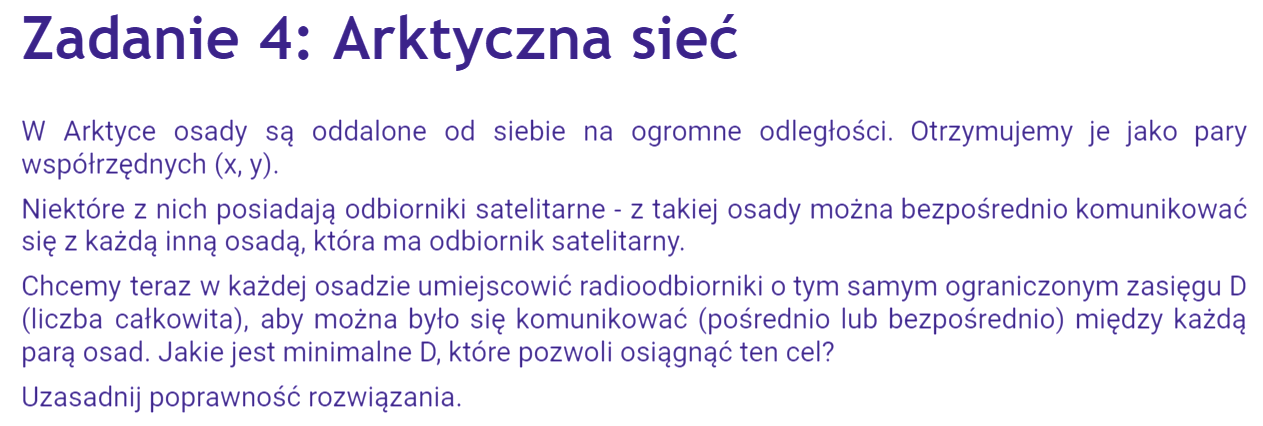

### Złożoność

###### Obliczeniowa:
$ O(V^2 \cdot log(V)) $, gdzie $ V $ - liczba punktów (osad) - bo $ E = O(V^2) $, gdzie $ E $ - liczba krawędzi w powstałym grafie (łączymy każdy punkt z każdym), a wszystkie krawędzie musimy przesortować według wag, więc otrzymujemy $ O(E \cdot log(E)) = O(V^2 \cdot log(V)) $.
###### Pamięciowa:
$ O(V^2) $, gdzie $ V $ - liczba punktów (osad)

### Implementacja

In [1]:
import math


class Node:
    def __init__(self, id_):
        self.id = id_
        self.parent = self
        self.rank = 0  # The upper tree's height limit
        

def find(x: 'Node object') -> 'set representative id':
    # If we have to compress a path as we are not a root of a tree
    if x != x.parent:
        # Point all sobsequent nodes on a path to the root node
        x.parent = find(x.parent)
    # Return the current (updated) parent of the node
    return x.parent


def union(x: 'Node object', y: 'Node object'):
    # Find parents of both x and y
    x = find(x)
    y = find(y)
    # Return if x and y are in the same set as there is nothing to do
    if x == y: return
    # Otherwise, link the smaller tree to the larger one
    if x.rank < y.rank:
        x.parent = y
    else:
        y.parent = x
        # If both x and y have the same rank and y was linked to x,
        # we have to increase the rank of x
        if x.rank == y.rank: x.rank += 1
            
            
def make_set(x: 'id'):
    return Node(x)


def connected(x: 'id', y: 'id'):
    return find(x) == find(y)


def kruskal(G: '(V, E)', S: 'indices of satellites'):
    V, E = G
    # Sort all edges by their weights
    E.sort(key=lambda e: e[2])
    # Makeset for each of the vertices
    vert = [make_set(v) for v in V]
    # Put all satellites in one set (as they are connected
    # at the beginning)
    for i in range(len(S) - 1):
        union(vert[S[i]], vert[S[i + 1]])
        
    D = float('inf')
    for edge in E:
        u, v, weight = edge
        if not connected(vert[u], vert[v]):
            union(vert[u], vert[v])
            D = weight
            
    # Return the last edge (of the greatest length)
    return D


def calc_dist(P1, P2):
    return math.sqrt((P1[0] - P2[0]) ** 2 + (P1[1] - P2[1]) ** 2)


def min_coverage_range(P: 'array of (x, y) coordinates of villages', S: 'array of satellites indices'):
    # Create an array of graph edges
    E = []
    
    n = len(P)
    for i in range(n - 1):
        for j in range(i + 1, n):
            E.append((i, j, calc_dist(P[i], P[j])))
            
    # Pick an edge of the greatest length
    result = kruskal((range(n), E), S)
    
    # Return the resulting distance
    return math.ceil(result)

###### Kilka testów

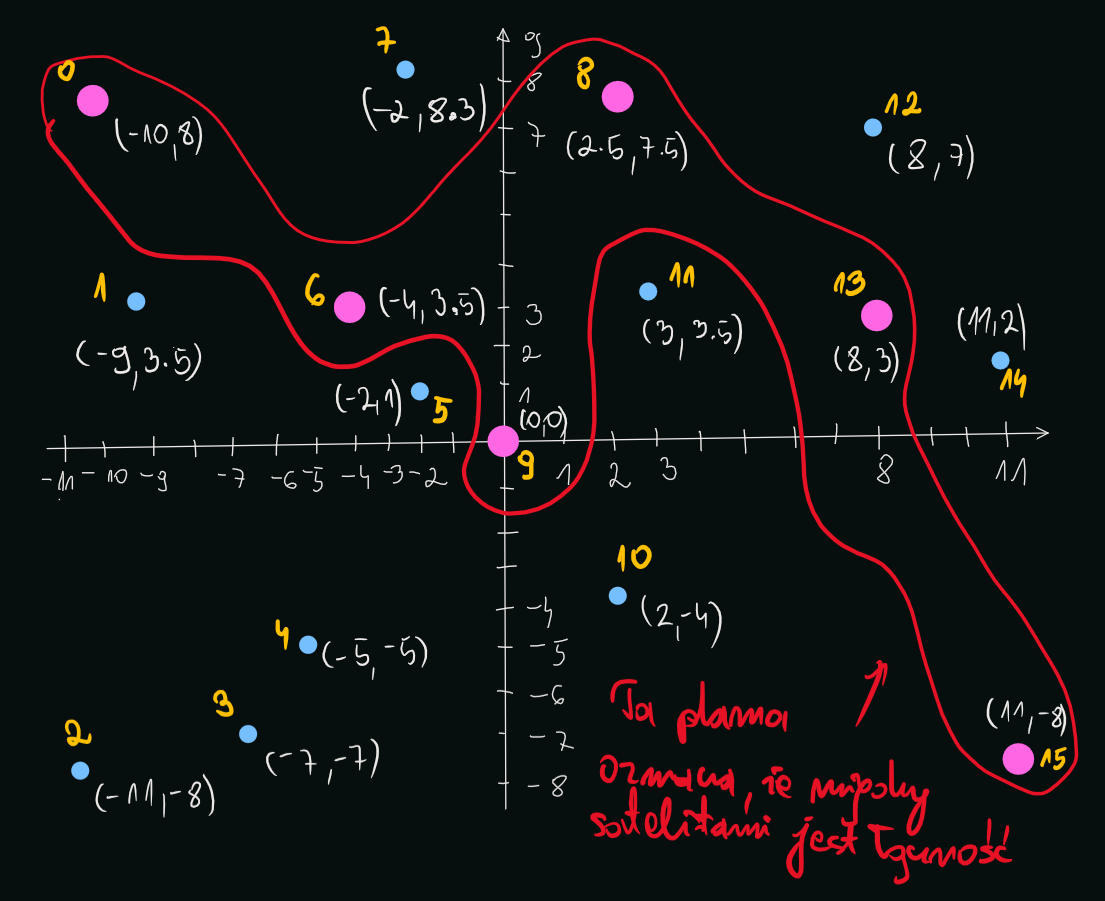

In [2]:
P = [(-10, 8), (-9, 3.5), (-11, -8), (-7, -7), (-5, -5), (-2, 1), (-4, 3.5), (-2, 8.3), (2.5, 7.5),
     (0, 0), (2, -4), (3, 3.5), (8, 7), (8, 3), (11, 2), (11, -8)]
S = [0, 6, 8, 9, 13, 15]

print(min_coverage_range(P, S))

7


### (Dodatkowo) Wypisanie połączeń które zostaną utworzone między osadami

In [3]:
import math


class Node:
    def __init__(self, id_):
        self.id = id_
        self.parent = self
        self.rank = 0  # The upper tree's height limit
        

def find(x: 'Node object') -> 'set representative id':
    # If we have to compress a path as we are not a root of a tree
    if x != x.parent:
        # Point all sobsequent nodes on a path to the root node
        x.parent = find(x.parent)
    # Return the current (updated) parent of the node
    return x.parent


def union(x: 'Node object', y: 'Node object'):
    # Find parents of both x and y
    x = find(x)
    y = find(y)
    # Return if x and y are in the same set as there is nothing to do
    if x == y: return
    # Otherwise, link the smaller tree to the larger one
    if x.rank < y.rank:
        x.parent = y
    else:
        y.parent = x
        # If both x and y have the same rank and y was linked to x,
        # we have to increase the rank of x
        if x.rank == y.rank: x.rank += 1
            
            
def make_set(x: 'id'):
    return Node(x)


def connected(x: 'id', y: 'id'):
    return find(x) == find(y)


def kruskal(G: '(V, E)', S: 'indices of satellites'):
    V, E = G
    # Sort all edges by their weights
    E.sort(key=lambda e: e[2])
    # Makeset for each of the vertices
    vert = [make_set(v) for v in V]
    # Put all satellites in one set (as they are connected
    # at the beginning)
    for i in range(len(S) - 1):
        union(vert[S[i]], vert[S[i + 1]])
        
    edges = []
    D = float('inf')
    for edge in E:
        u, v, weight = edge
        if not connected(vert[u], vert[v]):
            union(vert[u], vert[v])
            edges.append((u, v))
            D = weight
            
    # Return the last edge (of the greatest length)
    return D, edges


def calc_dist(P1, P2):
    return math.sqrt((P1[0] - P2[0]) ** 2 + (P1[1] - P2[1]) ** 2)


def min_coverage_range(P: 'array of (x, y) coordinates of villages', S: 'array of satellites indices'):
    # Create an array of graph edges
    E = []
    
    n = len(P)
    for i in range(n - 1):
        for j in range(i + 1, n):
            E.append((i, j, calc_dist(P[i], P[j])))
            
    # Pick an edge of the greatest length
    D, edges = kruskal((range(n), E), S)
    
    # Return the resulting distance
    return math.ceil(D), edges

###### Kilka testów

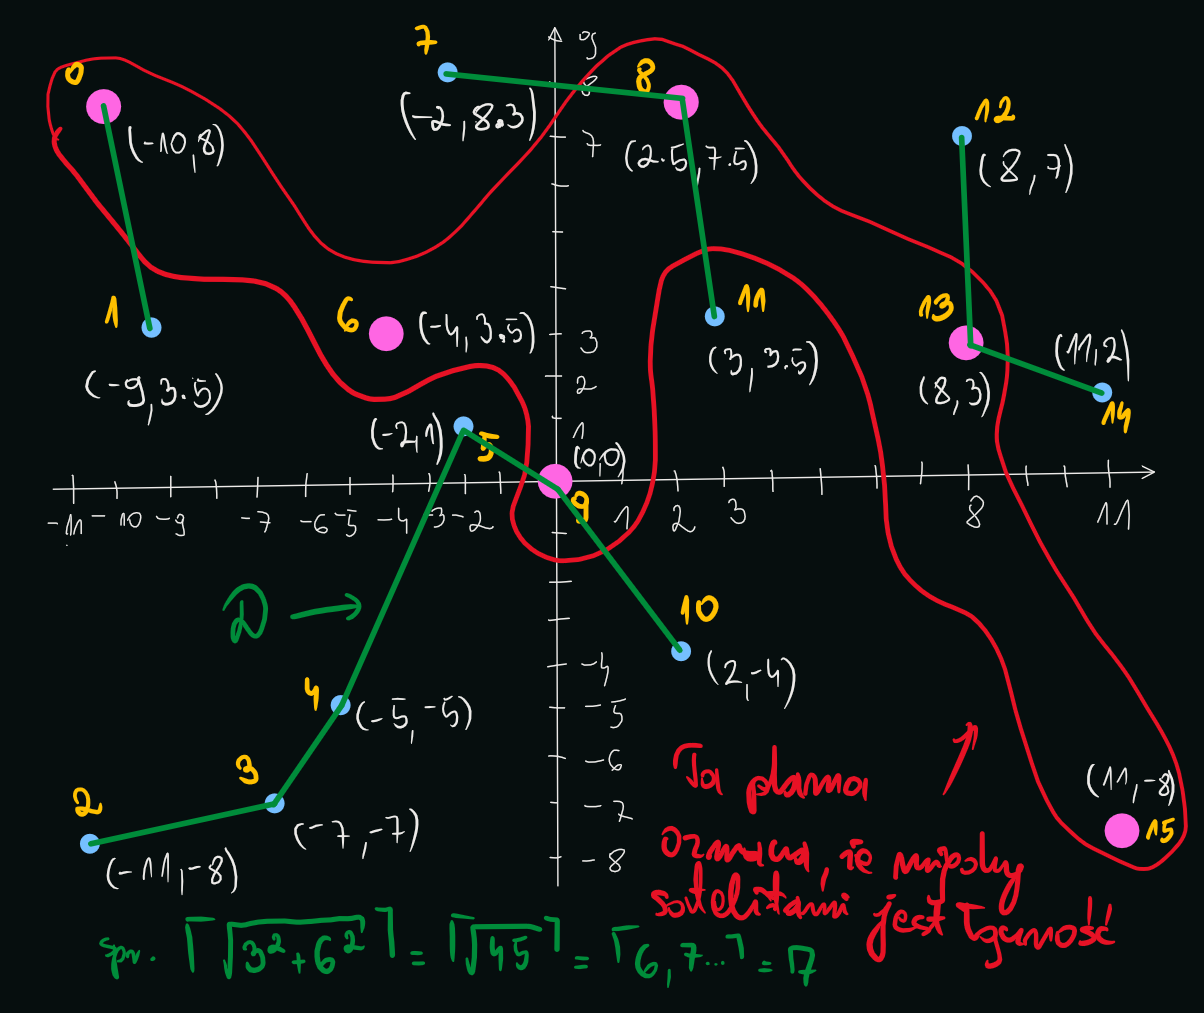

In [4]:
P = [(-10, 8), (-9, 3.5), (-11, -8), (-7, -7), (-5, -5), (-2, 1), (-4, 3.5), (-2, 8.3), (2.5, 7.5),
     (0, 0), (2, -4), (3, 3.5), (8, 7), (8, 3), (11, 2), (11, -8)]
S = [0, 6, 8, 9, 13, 15]

D, edges = min_coverage_range(P, S)
print('D =', D)
print('List of connected villages:')
for u, v in edges:
    print(f'{u:>2} - {v:<2}   ({str(P[u])} - {str(P[v])})')

D = 7
List of connected villages:
 5 - 9    ((-2, 1) - (0, 0))
 3 - 4    ((-7, -7) - (-5, -5))
13 - 14   ((8, 3) - (11, 2))
12 - 13   ((8, 7) - (8, 3))
 8 - 11   ((2.5, 7.5) - (3, 3.5))
 2 - 3    ((-11, -8) - (-7, -7))
 9 - 10   ((0, 0) - (2, -4))
 7 - 8    ((-2, 8.3) - (2.5, 7.5))
 0 - 1    ((-10, 8) - (-9, 3.5))
 4 - 5    ((-5, -5) - (-2, 1))
